## Exploratory data Analysis on all batches of FMECA
#### Identifying patterns and trends

In [65]:

import xlwings as xw
import os
import pandas as pd
import numpy as np
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(18,10)})

Choose the file to explore

In [66]:
#-- All batches combined file
allbatches = 'Allbatches1.xlsx'
pathAllBatches = 'C:/Users/nisha/OneDrive - Floating Solutions Consulting/Documents/04. Projects/JAD-01 MV Main Deck/03. Working/FMECA/Batch 5 FMECA 2022/FMECA spreadsheets/AN_working'
shtAllBatches = 'Sheet1'
cellRangeAllBatches = 'A1:BP1124'

#-- Batch 5A defined
batch5a = 'FSC-JAD-01-TEC-61-A1 MV FMECA-Batch 5 LBHD - AN.xlsx' 
pathBatch5a = 'C:/Users/nisha/OneDrive - Floating Solutions Consulting/Documents/04. Projects/JAD-01 MV Main Deck/03. Working/FMECA/Batch 5 FMECA 2022/FMECA spreadsheets'
shtBatch5a = '5- 4S WBT FMECA'
cellRangeBatch5a = 'A5:BO514'


#-- Batch 5B defined
batch5b = 'FSC-JAD-01-TEC-61-A1 MV FMECA-Batch 5 LBHD - KCH.xlsx' 
pathBatch5b = 'C:/Users/nisha/OneDrive - Floating Solutions Consulting/Documents/04. Projects/JAD-01 MV Main Deck/03. Working/FMECA/Batch 5 FMECA 2022/FMECA spreadsheets'
shtBatch5b = '5- 4S WBT FMECA'
cellRangeBatch5b = 'A5:BO684'


Function to import dataset

In [67]:
def importdf(nameFile,path,sheet,cellRange):
    file_path = os.path.join(path,nameFile)
    book = xw.Book(file_path)
    sht = book.sheets[sheet]
    rng = sht.range(cellRange)
    df = rng.options(pd.DataFrame, index=False, header=True).value
    return df

Importing datasets

In [68]:
df1 = importdf(batch5a,pathBatch5a,shtBatch5a,cellRangeBatch5a)
#df2 = importdf(batch5b,pathBatch5b,shtBatch5b,cellRangeBatch5b)

In [69]:
#df = pd.concat([df1, df2], axis=0)
df = df1

In [70]:
df["Anomaly Type"].unique()

array(['AW', 'P', 'CB', 'AC', 'B'], dtype=object)

In [71]:
df.head(2)

,Item No.,Report reference,Anomaly ID,Anomaly Type,Frame(s),Stiffener(s),Structural Component,Length (X),Width/Height\n(Y),"Nearest transverse member (Fr., TWF,TBHD)",Longitudinal\n(l) (distance\nfrom in mm),"Nearest longitudinal member (SS,ObLBHD)",Transverse (t) (distance from in mm),Grade,Weight\n(kgs),As Built Thickness\n(mm),Max Allowable Diminution (%),Renewal Thickness (mm),Substantial Corer Thickness (mm),EN01,EN02,EN03,EN04,EN05,EN06,EN07,EN08,EN09,EN10,Average UTM Reading (mm),Minimum \nUTT \nReading,(mm),(%),FLAG,Primary Structure,Secondary Structure,Local Structure,Detail Structure,Anomaly Nature,Concatenate,Sev,Occ,Det,RPN\npre-action,Adj Occ pre,Adj\nRPN \npre-action,Required Engineering Action,Has engineering action been completed ?,Generic action (following engineering action),Sev2,Occ2,Det2,RPN\npost-action,Adj Occ post,Adj\nRPN \npost-action,Avg % diminution,Anom extents,Stress level (location on span),Proximity / density of anom.,Stress / buckling calc?,Final Anomaly description,Location,Detail,Repair,Inspection interval,Column1,Assessment notes
0,1.0,VER-52531-4SWBT-LBHD-CR-0001-1379,4SWBT-LBHD-CR-192,AW,49-50,LL15,LBHD,4200.0,100.0,FR.49,500.0,LL15,0.0,AH,44.5,13.0,0.2,10.4,11.05,8.0,6.9,8.7,3.7,4.1,7.5,7.9,7.4,7.5,6.2,6.7900,3.7,6.2100,0.477692,R,Long'l bhd,Panel,Plate,None,Corrosion,Long'l bhdPanelPlateCorrosion,5.0,7.0,8.0,280.0,None,0.0,Investigate further and perform calculation if...,No,Arrest & monitor CVI,5.0,3.0,4.0,60.0,NaN,0.0,0.477692,Local,Med,Med,Y,Generalised corrosion,Tank boundary plating,Greater than 6mm remaining,Arrest and monitor CVI,-,None,Local Generalised corrosion on the longitudina...
1,2.0,VER-52531-4SWBT-LBHD-CR-0001-1379,4SWBT-LBHD-CR-193,AW,49-50,LL21,LBHD,4000.0,100.0,FR.49,50.0,LL21,0.0,AH,48.7,15.0,0.2,12.0,12.75,6.9,5.8,4.1,8.5,10.8,11.8,12.1,12.1,NaN,NaN,9.0125,4.1,5.9875,0.399167,R,Long'l bhd,Panel,Plate,None,Corrosion,Long'l bhdPanelPlateCorrosion,5.0,7.0,8.0,280.0,None,0.0,Investigate further and perform calculation if...,No,Arrest & monitor CVI,5.0,3.0,4.0,60.0,5.0,100.0,0.399167,Local,Med,Med,Y,Generalised corrosion,Tank boundary plating,Greater than 6mm remaining,Arrest and monitor CVI,-,None,Local Generalised corrosion on the longitudina...


Items that require further investigation. <br>
Column name -  Detail

In [72]:
#-- filter 'detail' column == 'investigate'
df3 = df[df['Detail']=='investigate']

Text(0.5, 1.0, 'Repair method')

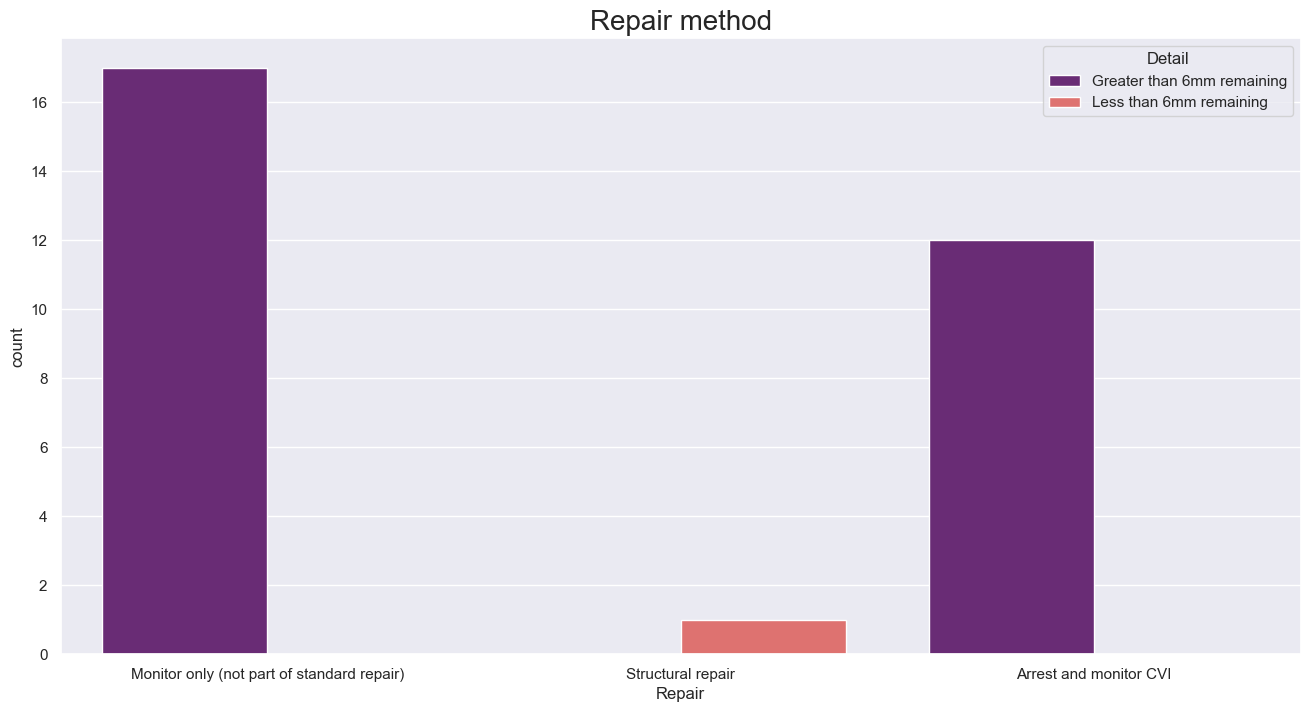

In [73]:
sns.set(rc={'figure.figsize':(16,8)})
a = sns.countplot(x= 'Repair',
hue = 'Detail',
data = df[(df['Final Anomaly description'] == 'Pit within generalised corrosion')],
palette='magma')

a.axes.set_title('Repair method',fontsize=20)


In [74]:
e = [
    "4SWBT-LBHD-CR-210",
"4SWBT-LBHD-CR-212",
"4SWBT-LBHD-CR-213",
"4SWBT-LBHD-CR-335",
"4SWBT-LBHD-CR-336",
"4SWBT-LBHD-CR-337",
"4SWBT-LBHD-CR-338",
"4SWBT-LBHD-CR-637",
"4SWBT-LBHD-CR-638",
"4SWBT-LBHD-CR-639",

]


In [94]:
lookingFor = df[df['Anomaly ID'].isin(e)][["Anomaly ID","As Built Thickness\n(mm)","Average UTM Reading (mm)","Detail Structure"]]

In [95]:
lookingFor

,Anomaly ID,As Built Thickness\n(mm),Average UTM Reading (mm),Detail Structure
18,4SWBT-LBHD-CR-210,14.5,10.300000,None
20,4SWBT-LBHD-CR-212,14.5,10.000000,None
21,4SWBT-LBHD-CR-213,14.5,10.450000,None
143,4SWBT-LBHD-CR-335,14.5,11.200000,None
144,4SWBT-LBHD-CR-336,14.5,8.570000,None
145,4SWBT-LBHD-CR-337,14.5,9.966667,None
146,4SWBT-LBHD-CR-338,14.5,9.840000,None
445,4SWBT-LBHD-CR-637,10.0,6.800000,Web
446,4SWBT-LBHD-CR-638,10.0,7.000000,Web
447,4SWBT-LBHD-CR-639,10.0,6.250000,Web


In [93]:
df.head(1)

,Item No.,Report reference,Anomaly ID,Anomaly Type,Frame(s),Stiffener(s),Structural Component,Length (X),Width/Height\n(Y),"Nearest transverse member (Fr., TWF,TBHD)",Longitudinal\n(l) (distance\nfrom in mm),"Nearest longitudinal member (SS,ObLBHD)",Transverse (t) (distance from in mm),Grade,Weight\n(kgs),As Built Thickness\n(mm),Max Allowable Diminution (%),Renewal Thickness (mm),Substantial Corer Thickness (mm),EN01,EN02,EN03,EN04,EN05,EN06,EN07,EN08,EN09,EN10,Average UTM Reading (mm),Minimum \nUTT \nReading,(mm),(%),FLAG,Primary Structure,Secondary Structure,Local Structure,Detail Structure,Anomaly Nature,Concatenate,Sev,Occ,Det,RPN\npre-action,Adj Occ pre,Adj\nRPN \npre-action,Required Engineering Action,Has engineering action been completed ?,Generic action (following engineering action),Sev2,Occ2,Det2,RPN\npost-action,Adj Occ post,Adj\nRPN \npost-action,Avg % diminution,Anom extents,Stress level (location on span),Proximity / density of anom.,Stress / buckling calc?,Final Anomaly description,Location,Detail,Repair,Inspection interval,Column1,Assessment notes
0,1.0,VER-52531-4SWBT-LBHD-CR-0001-1379,4SWBT-LBHD-CR-192,AW,49-50,LL15,LBHD,4200.0,100.0,FR.49,500.0,LL15,0.0,AH,44.5,13.0,0.2,10.4,11.05,8.0,6.9,8.7,3.7,4.1,7.5,7.9,7.4,7.5,6.2,6.79,3.7,6.21,0.477692,R,Long'l bhd,Panel,Plate,None,Corrosion,Long'l bhdPanelPlateCorrosion,5.0,7.0,8.0,280.0,None,0.0,Investigate further and perform calculation if...,No,Arrest & monitor CVI,5.0,3.0,4.0,60.0,NaN,0.0,0.477692,Local,Med,Med,Y,Generalised corrosion,Tank boundary plating,Greater than 6mm remaining,Arrest and monitor CVI,-,None,Local Generalised corrosion on the longitudina...


In [96]:
abt_lbhd = {"LL00":14,
"LL01":14,
"LL02":14,
"LL03":14,
"LL04":11.5,
"LL05":11.5,
"LL06":11.5,
"LL07":11.5,
"LL08":12,
"LL09":12,
"LL10":12,
"LL11":12,
"LL12":13,
"LL13":13,
"LL14":13,
"LL15":13,
"LL16":14.5,
"LL17":14.5,
"LL18":14.5,
"LL19":14.5,
"LL20":15,
"LL21":15,
"LL22":15,
"LL23":16,
"LL24":16,
"LL25":16,
"LL26":19.5,
"LL27":19.5,
"UD":20.5,
"BP":18.0
}

In [97]:
abt_web = {"LL00":10,
"LL01":10,
"LL02":10,
"LL03":10,
"LL04":10,
"LL05":10,
"LL06":10,
"LL07":10,
"LL08":10,
"LL09":10,
"LL10":10,
"LL11":10,
"LL12":10,
"LL13":10,
"LL14":10,
"LL15":10,
"LL16":10,
"LL17":10,
"LL18":10.5,
"LL19":10.5,
"LL20":10.5,
"LL21":10.5,
"LL22":10.5,
"LL23":10.5,
"LL24":10.5,
"LL25":10.5,
"LL26":10.5,
"LL27":10.5,
"UD":12.0,
"BP":13.5
}


In [98]:
abt_flange = {"LL00":15.5,
"LL01":15.5,
"LL02":17,
"LL03":17,
"LL04":18.5,
"LL05":18.5,
"LL06":17,
"LL07":17,
"LL08":20,
"LL09":20,
"LL10":20,
"LL11":20,
"LL12":20,
"LL13":20,
"LL14":22,
"LL15":22,
"LL16":19.5,
"LL17":19.5,
"LL18":18,
"LL19":18,
"LL20":20,
"LL21":21,
"LL22":23,
"LL23":23,
"LL24":19.5,
"LL25":20.5,
"LL26":24.5,
"LL27":14,
"UD":17,
"BP":25
}

In [105]:
abt_df = pd.DataFrame([abt_lbhd,abt_web,abt_flange],index = ['abt_lbhd','abt_web','abt_flange'])

In [106]:
df_abt = abt_df.transpose()

In [117]:
df_abt[df_abt.index=="LL16"]

,abt_lbhd,abt_web,abt_flange
LL16,14.5,10.0,19.5


In [118]:
xw.view(df_abt)